In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import requests
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import re

In [105]:
### Create a list of world rankings
url = "https://pro.eslgaming.com/worldranking/csgo/rankingshistory/"

### Get page and render javascript
session = AsyncHTMLSession()
r = await session.get(url)
await r.html.arender()


### Start scraping page (not finished)
bs = BeautifulSoup(r.html.html)
for el in bs.find_all("div", class_="small"):
    print(el)

True

In [70]:
### Get a list of awpers from liquipedia
### Getting awpers
urls = ["https://liquipedia.net/counterstrike/Category:AWPers",
        "https://liquipedia.net/counterstrike/index.php?title=Category:AWPers&pagefrom=Galantis#mw-pages",
        "https://liquipedia.net/counterstrike/index.php?title=Category:AWPers&pagefrom=Powell#mw-pages"]

awpers = {"~~~~"} # Create a lookup table of awpers
for url in urls:
    res = requests.get(url)
    bs = BeautifulSoup(res.content)
    ### Toggle system to only get from first to last player on each page
    toggle = False
    for l in bs.find_all("a"):
        if "Ace" in l.get('href') or "/Galantis" in l.get('href') or "/Powell" in l.get('href'):
            toggle=True
        if toggle:
            s = l.get('href')[15:].lower()
            awpers.add(s) # Add base name
            if "_" in s:
                s = s[:s.find("_")] # add name with extra annotations removed
            awpers.add(s)
            s = re.sub(r'[^a-zA-Z0-9]', '', s)# Remove extra characters
            awpers.add(s)
        if "Gafolo" in l.get('href') or "Potei" in l.get('href') or "ZywOo" in l.get('href'):
            toggle=False

In [72]:
df = pd.read_csv("all games processed.csv", sep=',')
df= df.drop('Unnamed: 0', axis=1)

df['rating'] = df['rating'].apply(lambda s: float(s.replace("*", "")))
df['Awper'] = df['player name'].apply(lambda s: s in awpers)

In [73]:
players = df['player name'].unique()
teams = df['Player team'].unique()

In [74]:
df = df.assign(Date = pd.to_datetime(df['Date']))
df.sort_values('Date')

,Date,Player team,Opponent,Map,kd,pm,rating,player name,kd ratio,rounds won,rounds lost,Total rounds,Awper
380533,2012-01-11,dotpiXels,CPLAY,mrg,15 - 16,-1,0.87,legija,0.937500,16,6,22,False
474590,2012-01-11,gamed!de,iPLAY,trn,22 - 12,10,1.47,syrson,1.833333,16,7,23,True
469648,2012-01-11,ALTERNATE aTTaX,CPLAY,trn,15 - 12,3,0.96,krystal,1.250000,16,9,25,False
438636,2012-01-11,dotpiXels,CPLAY,mrg,32 - 13,19,2.19,tabsen,2.461538,16,6,22,False
485888,2012-01-12,BuyKey,ESC,inf,26 - 16,10,1.57,scream,1.625000,16,7,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275889,2023-12-04,Monte,Heroic,mrg,17 - 18,-1,0.88,worok,0.944444,12,16,28,False
650962,2023-12-04,500,BIG,anb,10 - 16,-6,0.65,niki,0.625000,8,16,24,False
275888,2023-12-04,Monte,Heroic,ovp,27 - 23,4,1.07,worok,1.173913,14,16,30,False
154783,2023-12-04,FORZE,Ninjas in Pyjamas,inf,16 - 16,0,1.10,jerry,1.000000,16,12,28,False


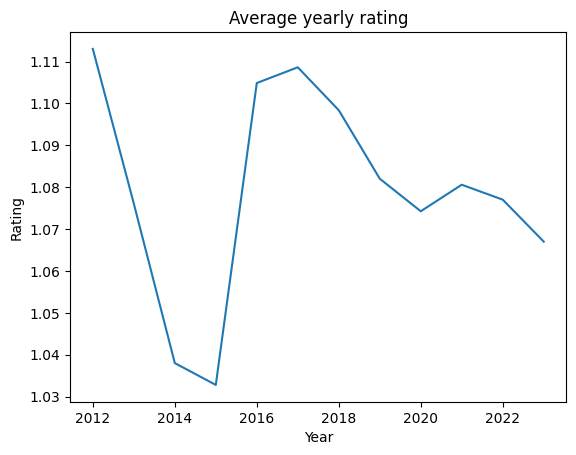

In [8]:
df.loc[1, 'Date'] < dt.datetime(2020,1,1)
x = np.arange(2012, 2024)
y = []

for year in x:
    mask = (dt.datetime(year,1,1) < df['Date']) & (df['Date'] < dt.datetime(year,12,31))
    y.append(df[mask]['rating'].mean())

plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Average yearly rating")
plt.show()